## Mini Project 03- NLP Emotions: Keyword Extraction

Dataset:
- A. Tripathi, "Emotion Classification NLP", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/datasets/anjaneyatripathi/emotion-classification-nlp. [Accessed: 16- Jul- 2022].

Sources:
- WASSA-2017 Shared Task on Emotion Intensity. Saif M. Mohammad and Felipe Bravo-Marquez. In Proceedings of the EMNLP 2017 Workshop on Computational Approaches to Subjectivity, Sentiment, and Social Media (WASSA), September 2017, Copenhagen, Denmark.
BibTex

Emotion Labels:
- joy: 1
- sadness: 2
- anger: 3
- fear: 4

### Import Libraries

In [37]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
import spacy
from pathlib import Path
import time


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import string
from collections import Counter
import re as regex

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import neattext.functions as nfx
import nltk

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [38]:
dfData = pd.read_csv("convertedTextDataset.csv")

In [39]:
dfData.head()

,Unnamed: 0,text,label,short
0,0,Just got back from seeing @GaryDelaney in Burs...,1,get see burslem amaze face hurt laugh hilarious
1,1,Oh dear an evening of absolute hilarity I don'...,1,dear even absolute hilarity don think laugh lo...
2,2,Been waiting all week for this game ❤️❤️❤️ #ch...,1,wait week game red heart red heart red heart c...
3,3,"@gardiner_love : Thank you so much, Gloria! Yo...",1,thank gloria sweet thoughtful day joyful love ...
4,4,I feel so blessed to work with the family that...,1,feel bless work family nanny red heart love am...


In [40]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7102 non-null   int64 
 1   text        7102 non-null   object
 2   label       7102 non-null   int64 
 3   short       7097 non-null   object
dtypes: int64(2), object(2)
memory usage: 222.1+ KB


In [41]:
dfData.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [42]:
dfData.shape

(7102, 3)

### Keyword Extract

In [43]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [44]:
def extract_keywords(text, num = 100):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [45]:
# extract joy keywords
# create a joy list 
joyList= dfData[dfData['label']== 1]['short'].tolist()
# print(joyList)

# create a joy document which store all the joy words in list
joyDoc= ' '.join(map(str, joyList))
# print(joyList)

# extract the keywords
joyKeywords = extract_keywords(joyDoc)

In [46]:
# extract sadness keywords
# create a sadness list 
sadList= dfData[dfData['label']== 2]['short'].tolist() 

# create a sadness document which store all the sad words in list
sadDoc= ' '.join([str(item) for item in sadList])

# extract the keywords
sadKeywords = extract_keywords(sadDoc)

In [47]:
# extract anger keywords
# create a anger list 
angerList= dfData[dfData['label']== 3]['short'].tolist() 

# create a anger document which store all the anger words in list
angerDoc= ' '.join([str(item) for item in angerList])

# extract the keywords
angerKeywords = extract_keywords(angerDoc)

In [48]:
# extract fear keywords
# create a fear list 
fearList= dfData[dfData['label']== 4]['short'].tolist() 

# create a fear document which store all the fear words in list
fearDoc= ' '.join([str(item) for item in fearList])

# extract the keywords
fearKeywords = extract_keywords(fearDoc)

In [49]:
def plot_wordcloud(docx, imageTag):
    mywordcloud = WordCloud(background_color="white").generate(docx)
    plt.figure(figsize = (13,10))
    plt.imshow(mywordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.savefig(f'{imageTag}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    plt.show()

In [50]:
imageTag= ['image03', 'image04', 'image05', 'image06']

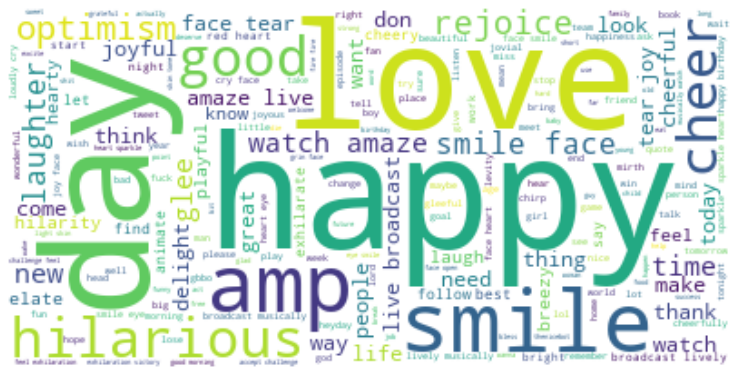

In [51]:
plot_wordcloud(joyDoc, imageTag[0])

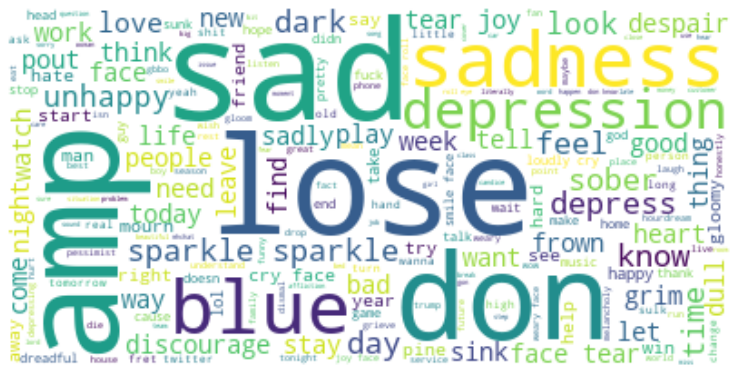

In [52]:
plot_wordcloud(sadDoc, imageTag[1])

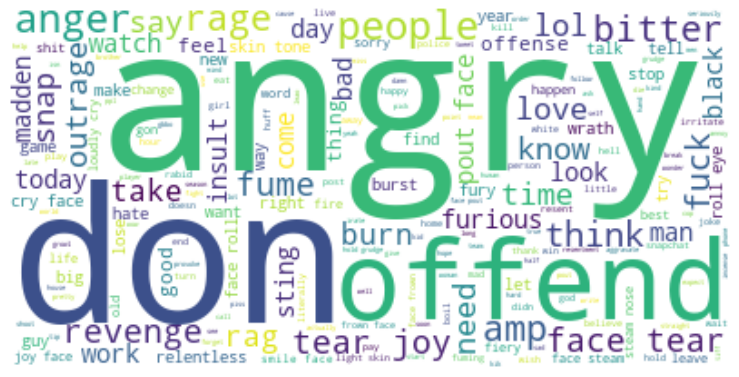

In [53]:
plot_wordcloud(angerDoc, imageTag[2])

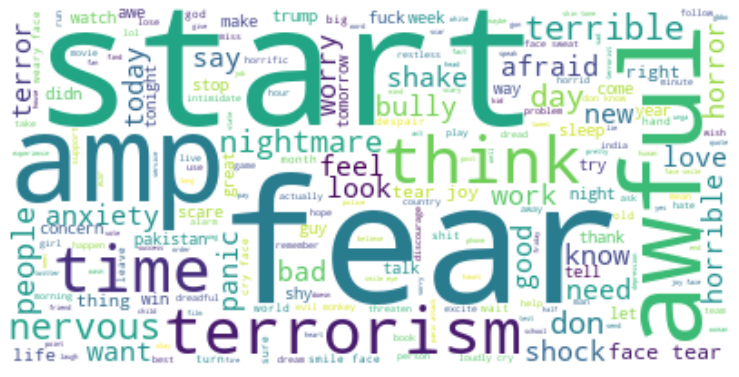

In [54]:
plot_wordcloud(fearDoc, imageTag[3])